In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from data_analysis_blocked import *
from calculate_corrs import *

# Data Initialization

In [25]:
# Extent of the lattice
Nx = 12
Nt = 12
# Spacial volume of the lattice
Vx = Nx**3
# The parameters in the action
m_sq = -1180.
lmbd = 10000.0
alpha = 0.004

version = "3-0"

# The number of trajectories until thermalization
cutoff = 1000
# The size of the blocks needed to get uncorrelated block averages
block_size = 200

In [9]:
C = Correlators(Nx, Nt, m_sq, lmbd, alpha, version, cutoff, block_size)

In [10]:
C.load(datetime.datetime.now().date())

FileNotFoundError: [Errno 2] No such file or directory: 'measurements_16x32_msq_-203.0_lmbd_1000.0_alph_0.007_2023-03-20_corrs.bin'

In [6]:
C.load_all_data()

Loading sigma_pion_corrs_16x32_msq_-203.0_lmbd_1000.0_alph_0.007_2023-02-27_1-9.bin
Loading sigma_pion_corrs_16x32_msq_-203.0_lmbd_1000.0_alph_0.007_2023-02-28_1-9.bin
Loading sigma_pion_corrs_16x32_msq_-203.0_lmbd_1000.0_alph_0.007_2023-03-07_1-9.bin
Loading sigma_pion_corrs_16x32_msq_-203.0_lmbd_1000.0_alph_0.007_2023-03-08_1-9.bin


In [6]:
C.calc_psq_vev()

In [7]:
C.calc_psqm_vev()

Vacuum Expectation Value of psqm = (0.06282491826257985+0j) +- (0.0006022907493572617+0j)
Vacuum Expectation Value of psqm = (0.062160006563325196+0j) +- (0.0004023750703212808+0j)
Vacuum Expectation Value of psqm = (0.06298058027915379+0j) +- (0.0007454098913823647+0j)
Vacuum Expectation Value of psqm = (0.047910954270270756+0j) +- (0.0002591377230702576+0j)
Vacuum Expectation Value of psqm = (0.0478008292298642+0j) +- (0.00038116095655605557+0j)
Vacuum Expectation Value of psqm = (0.04771103752240162+0j) +- (0.0003448542152151817+0j)
Vacuum Expectation Value of psqm = (0.0398296827446268+0j) +- (0.0002589966060402887+0j)
Vacuum Expectation Value of psqm = (0.039315164245891966+0j) +- (0.0002099359404906927+0j)
Vacuum Expectation Value of psqm = (0.03965683322587863+0j) +- (0.00025650622838915957+0j)
Vacuum Expectation Value of psqm = (0.03987142488568834+0j) +- (0.0001687561865702885+0j)
Vacuum Expectation Value of psqm = (0.03511344625248885+0j) +- (0.00016545759347354864+0j)
Vacuum

In [6]:
C.calc_pipim_s_corrs()

Vacuum Expectation Value of sigma = -0.09439738528834135 +- 0.001138964363575901


In [10]:
pipim_ts = C.apply_to_timeslices_m(np.array(C.timeslices_m),lambda ts: (ts[1]+ts[2]+ts[3])*np.conj(ts[1]+ts[2]+ts[3])/3)
len(pipim_ts),len(pipim_ts[0])

(6650, 16)

In [12]:
len(C.timeslices_m[0][0])

32

In [15]:
# Load preprocessed data
date = "2023-03-08"
data = LatticeData(Nx, Nt, m_sq, lmbd, alpha, version, cutoff, block_size)
data.load(date)

FileNotFoundError: [Errno 2] No such file or directory: 'analysis_12x12_msq_-1100.0_lmbd_10000.0_alph_0.0005_2023-03-08.bin'

In [26]:
# Load unprocessed data
date = "2023-01"
day = "16"
data = LatticeData(Nx, Nt, m_sq, lmbd, alpha, version, cutoff, block_size)
data.load_all_data()
step_size = data.psq_dist_center/32.0

Loading output_data/measurements_12x12_msq_-1180.0_lmbd_10000.0_alph_0.004_2023-05-17_3-0.bin
Loading output_data/measurements_12x12_msq_-1180.0_lmbd_10000.0_alph_0.004_2023-05-18_3-0.bin
Loading output_data/measurements_12x12_msq_-1180.0_lmbd_10000.0_alph_0.004_2023-05-19_3-0.bin


Average acceptance rate after cutoff: 0.9179642182452855


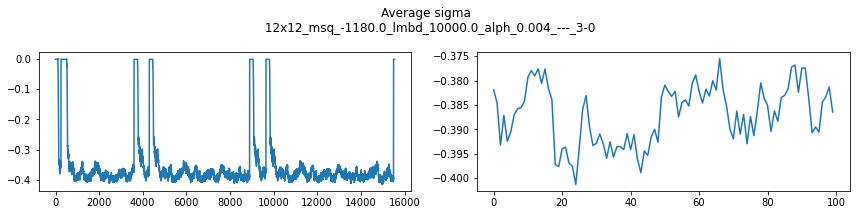

In [27]:
# Plot an observable
data.plot_sigma(100)
#plt.legend()
plt.show()

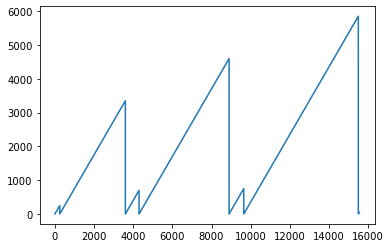

In [28]:
plt.plot(data.trajs)

# Momentum Distribution

In [110]:
import qlat as q
q.begin()

qlat::begin(): MPI Initialized. num_node = 1
qlat::begin_comm(comm,size_node): get_comm_list().push_back()
qlat::begin_comm(comm,size_node): get_comm_list().size() = 3
qlat::begin(): q_num_threads = 2
qlat::begin(): GeometryNode =
{ initialized = true
, num_node    = 1
, id_node     = 0
, size_node   = 1x1x1x1
, coor_node   = 0x0x0x0 }
Timer::get_timer_database().size() = 91
Timer::get_timer_stack().size() = 0


In [112]:
mult = 4

geo = q.Geometry([Nx, Nx, Nx, Nt], mult)
masses = q.Field(q.ElemTypeDouble,geo,mult)
masses.load_double(f"output_data/masses_{Nx}x{Nt}_msq_{m_sq}_lmbd_{lmbd}_alph_{alpha}_2023-05-15_{version}.field")

read_field: fn='output_data/masses_8x8_msq_-1080.0_lmbd_10000.0_alph_0.001_2023-05-15_2-0.field'.


131072

In [113]:
m = np.power([[masses.get_elem([0,0,0,0],0),masses.get_elem([1,0,0,0],0),masses.get_elem([0,2,0,0],0),masses.get_elem([3,0,0,0],0)],
    [masses.get_elem([0,0,0,0],1),masses.get_elem([1,0,0,0],1),masses.get_elem([0,2,0,0],1),masses.get_elem([3,0,0,0],1)]], 1)

In [114]:
np.var(data.momentums,axis=0)

array([[ 2.69655052,  5.43730296,  6.22654577,  8.65145662],
       [ 2.57803319,  7.22069416,  8.52872006, 10.49072122]])

In [115]:
m/np.var(data.momentums,axis=0)

array([[0.97188374, 0.39744322, 0.46248152, 0.39786852],
       [0.66094074, 0.28931148, 0.33787668, 0.33045092]])

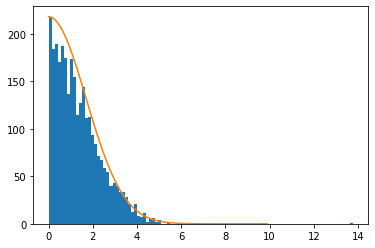

In [124]:
counts = plt.hist(np.abs(np.real(np.array(data.momentums)))[:,0,2], 100)
f = lambda p : np.exp(-p**2/(2*m[0,2]))
plt.plot(np.arange(0,10,0.1), f(np.arange(0,10,0.1))*counts[0][0])

In [117]:
rsi = q.RngState("test_hmc_pions-{}x{}x{}x{}")
q.g_rand_gen(rsi, 0, 1)

AttributeError: module 'qlat' has no attribute 'g_rand_gen'

# $\langle \pi(p)\pi(p)\rangle$

In [12]:
def pim_correlator(tslices,tslices_m,delta_t):
        rtn = 0
        for t0 in range(data.Nt):
            rtn += (tslices[t0%data.Nt][1]*tslices_m[(t0+delta_t)%data.Nt][1] + 
                    tslices[t0%data.Nt][2]*tslices_m[(t0+delta_t)%data.Nt][2] + 
                    tslices[t0%data.Nt][3]*tslices_m[(t0+delta_t)%data.Nt][3])/3.0
        return rtn/data.Nt

#pim_corrs=[]
#pim_corr_avgs=[]
for j in range(1,2):#len(data.timeslices_m[0])):
    pim_corrs.append([[pim_correlator(np.conj(data.timeslices_m[i][j]),data.timeslices_m[i][j],dt) for dt in range(data.Nt)] for i in range(data.cutoff,data.data_len)])
    pim_corr_avgs.append(np.mean(pim_corrs[j],axis=0))
    print(j)

#pim_corr_avg_blocks = data.get_jackknife_blocks(pim_corrs)
#pim_corr_avgs_bc, pim_corr_errs = data.get_errors_from_blocks(pim_corr_avgs, pim_corr_avg_blocks)

KeyboardInterrupt: 

In [7]:
plt.plot(np.real(C.corr_avgs["pipim"][0]))

KeyError: 'pipim'

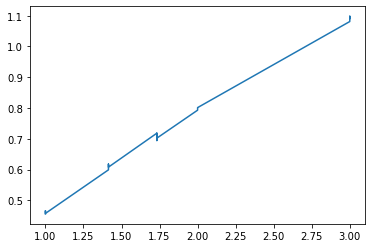

In [21]:
r=[]
E=[]
kinematic_ms = [[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [1,1,0,0],
                [1,0,1,0],
                [0,1,1,0],
                [1,1,1,0],
                [-1,1,1,0],
                [1,-1,1,0],
                [1,1,-1,0],
                [2,0,0,0],
                [0,2,0,0],
                [0,0,2,0],
                [3,0,0,0],
                [0,3,0,0],
                [0,0,3,0]]
for i in range(16):
    E.append(data.find_mass_from_fit(np.real(pim_corr_avgs[i]))[0])
    r.append((kinematic_ms[i][0]**2+kinematic_ms[i][1]**2+kinematic_ms[i][2]**2+kinematic_ms[i][3]**2)**0.5)
plt.plot(r,E)

In [22]:
plt.errorbar(range(len(pim_corr_avgs_bc)),np.real(pim_corr_avgs_bc), yerr=np.real(pim_corr_errs))
#plt.errorbar(range(len(pim_corr_avgs_bc2)),np.real(pim_corr_avgs_bc2)*np.real(pim_corr_avgs_bc)[0]/np.real(pim_corr_avgs_bc2)[0], yerr=np.real(pim_corr_errs2)*np.real(pim_corr_avgs_bc)[0]/np.real(pim_corr_avgs_bc2)[0])

NameError: name 'pim_corr_avgs_bc' is not defined

# $\langle \sigma \pi(p)\pi(-p)\rangle$

In [ ]:
for m in range(len(data.timeslices_m[0])):
    data.calc_pipim_sigma_corrs(m)
    print(m)

In [12]:
plt.plot(np.abs([data.pipim_s_corr_avgs[0]])/np.abs([data.pipim_s_corr_avgs[0]][2]))

IndexError: list index out of range

In [5]:
data.calc_pipi_sigma_corrs()

Vacuum Expectation Value of phi_i^2 = 1743.0804344218645 +- ?


In [15]:
data.calc_pipi_pipi_corrs()

Average phi^2 = 1.199557507210016 +- 1.1914205387381649e-05


In [16]:
data.calc_sigma_corrs()

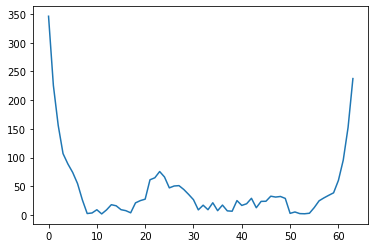

In [20]:
plt.plot(np.abs(data.pipim_s_corr_avgs[1]))

In [9]:
def calc_pipi_sigma_energy(self):
        if(self.pipi_sigma_energy_done):
            return
        self.calc_pipi_sigma_corrs()
        blocks = self.get_jackknife_blocks(np.real(self.pipi_s_corrs), self.find_mass_from_fit)
        [[E, A],[E_err,A_err]] = self.get_errors_from_blocks(self.find_mass_from_fit(np.real(self.pipi_s_corr_avgs)), blocks)
        print(f"<pipi sigma> energy is {E}/a +- {E_err}/a")
        self.pipi_sigma_E = E
        self.pipi_sigma_E_err = E_err
        self.pipi_sigma_energy_done=True

calc_pipi_sigma_energy(data)

<pipi sigma> energy is 0.2788359065269675/a +- 0.022465582427987657/a


<ErrorbarContainer object of 3 artists>

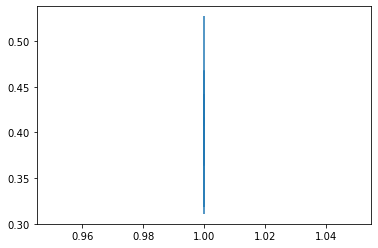

In [18]:
r=[]
E=[]
E_err=[]
kinematic_ms = [[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [1,1,0,0],
                [1,0,1,0],
                [0,1,1,0],
                [1,1,1,0],
                [-1,1,1,0],
                [1,-1,1,0],
                [1,1,-1,0],
                [2,0,0,0],
                [0,2,0,0],
                [0,0,2,0],
                [3,0,0,0],
                [0,3,0,0],
                [0,0,3,0]]
for i in range(3):
    data.calc_pipim_sigma_energy(i)
    E.append(data.pipim_sigma_E[i])
    E_err.append(data.pipim_sigma_E_err[i])
    r.append((kinematic_ms[i][0]**2+kinematic_ms[i][1]**2+kinematic_ms[i][2]**2+kinematic_ms[i][3]**2)**0.5)

plt.errorbar(r,E, yerr=E_err)

<ErrorbarContainer object of 3 artists>

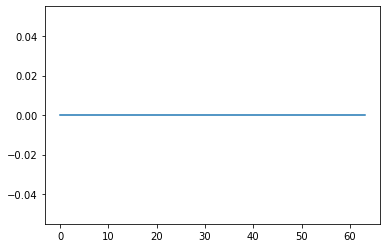

In [62]:
mi = 0
data.cutoff=0
spipim_corr_avg_blocks = data.get_jackknife_blocks(spipim_corrs[mi])
spipim_corr_avgs_bc, spipim_corr_errs = data.get_errors_from_blocks(spipim_corr_avgs[mi], spipim_corr_avg_blocks)
plt.errorbar(range(len(spipim_corr_avgs_bc)),np.real(spipim_corr_avgs_bc), yerr=np.real(spipim_corr_errs))

# $\langle \sigma(p)\sigma\rangle$

In [9]:
def sm_correlator(tslices,tslices_m,vev_sigma,delta_t):
    rtn = 0
    for t0 in range(data.Nt):
        rtn += (tslices[t0%data.Nt][0]/data.Vx)*(tslices_m[(t0+delta_t)%data.Nt][0]/data.Vx)
    return rtn/data.Nt

data.calc_sigma_vev()
sm_corrs = [[sm_correlator(np.conj(data.timeslices_m[i][1]),data.timeslices_m[i][1],data.vev_sigma,dt) for dt in range(data.Nt)] for i in range(data.cutoff,data.data_len)]

sm_corr_avgs = np.mean(sm_corrs,axis=0)

sm_corr_avg_blocks = data.get_jackknife_blocks(sm_corrs)
sm_corr_avgs_bc, sm_corr_errs = data.get_errors_from_blocks(sm_corr_avgs, sm_corr_avg_blocks)

<ErrorbarContainer object of 3 artists>

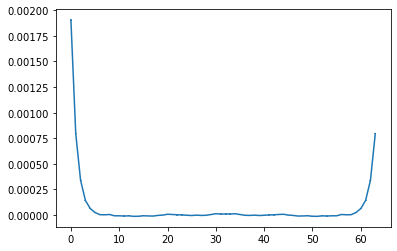

In [10]:
plt.errorbar(range(len(sm_corr_avgs_bc)),np.real(sm_corr_avgs_bc), yerr=np.real(sm_corr_errs))

# Block Size Determination
This part of the code can be used to determine the appropriate block_size, but does not need to be run every time.

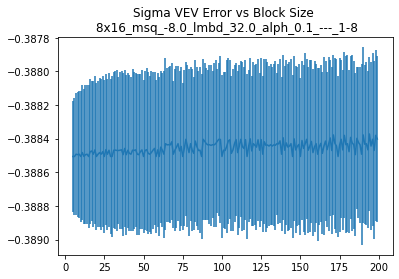

In [44]:
data.scan_phi0_done=False
data.scan_phi0(range(5,200))
data.plot_phi0_scan()

In [52]:
data.scan_pion_mass_done=False
data.scan_pion_mass(range(50,500,5))
data.plot_pion_scan()

KeyboardInterrupt: 

# Vacuum Expectation Values

In [9]:
data.calc_sigma_vev()
print(data.vev_sigma)
data.calc_phisq()

Vacuum Expectation Value of sigma = -0.0006895143097902297 +- 0.00018936948672043844
-0.0006895143097902297
Average phi^2 = 0.6592736245907309 +- 7.4339914680928664e-06


# Quick Calculations

In [4]:
data.calc_quick_ests()

Vacuum Expectation Value of sigma = -0.21861434429386267 +- 0.0018518242082776186
The pion mass is approximately: 0.30840036736634324
The sigma mass is approximately: 0.49170441108416124
F_pi is approximately: 0.2912215504560203


# Pion Mass

Pion mass is 0.28888557872697435/a +- 0.0053708837508720155/a


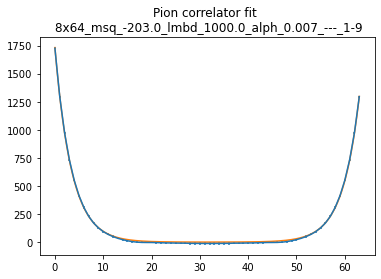

In [8]:
data.plot_pion_fit()

# Sigma Mass

Sigma mass is 0.3182208402798526/a +- 0.009237708891916259/a


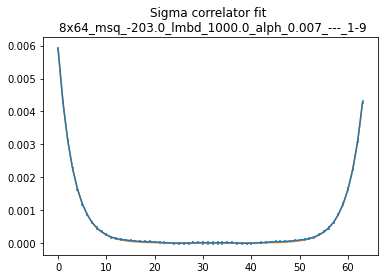

In [15]:
data.plot_sigma_fit()

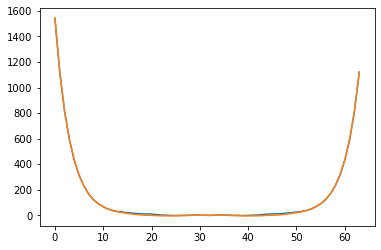

In [20]:
s = np.mean(data.s_corrs,axis=0)
plt.plot(s/s[0]*C.corr_avgs["ss"][0])
plt.plot(C.corr_avgs["ss"])

# Pion Decay Constant

F_pi is 0.41073928442867774/a +- 0.018960810039180175/a
m_pi is 0.2620233638063054/a +- 0.01393399199515465/a


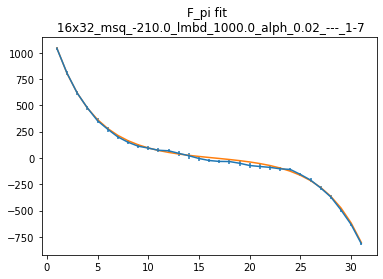

In [89]:
data.plot_fpi_fit()

# $\phi^2$ Distribution

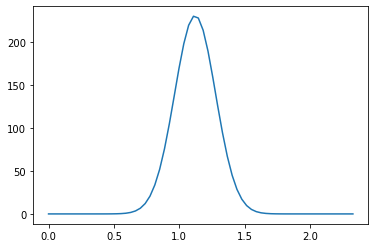

In [18]:
step_size = data.psq_dist_center/32.0
plt.plot(np.multiply(range(64),step_size),np.divide(data.phi_sq_dist,(np.add(range(64),0.5)*step_size)**2))

# Pi Pi to Sigma

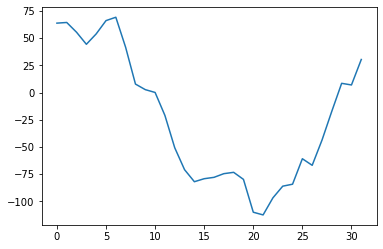

In [102]:
data.calc_pipi_sigma_corrs()
plt.plot(data.pipi_s_corr_avgs/data.pipi_pipi_corr_avgs[0]**0.5/data.s_corr_avgs[0]**0.5)

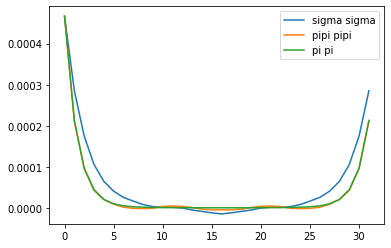

In [101]:
data.calc_pipi_pipi_corrs()
data.calc_sigma_corrs()
plt.plot(data.s_corr_avgs*data.s_corr_avgs[0]/data.s_corr_avgs[0], label="sigma sigma")
plt.plot(data.pipi_pipi_corr_avgs*data.s_corr_avgs[0]/data.pipi_pipi_corr_avgs[0], label="pipi pipi")
#plt.plot(data.pipi_s_corr_avgs*data.s_corr_avgs[0]/data.pipi_s_corr_avgs[0], label="pipi sigma")
plt.plot(data.pi_corr_avgs**2*data.s_corr_avgs[0]/data.pi_corr_avgs[0]**2, label="pi pi")
plt.legend()

/tmp/ipykernel_14364/12434300.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(data.pipi_pipi_corr_avgs[:20]), label="pipi pipi")


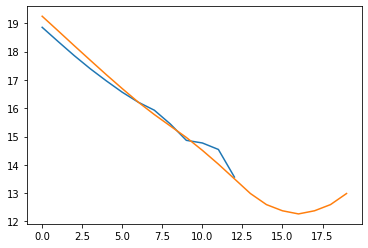

In [93]:
plt.plot(np.log(data.pipi_pipi_corr_avgs[:20]), label="pipi pipi")
plt.plot(np.log(data.pi_corr_avgs[:20]**2), label="pi pi")

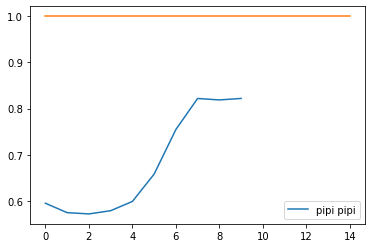

In [33]:
pipi = data.pi_corr_avgs**2

#plt.plot(data.s_corr_avgs*data.pipi_pipi_corr_avgs[0]/data.s_corr_avgs[0]/pipi, label="sigma sigma")
plt.plot(data.pipi_pipi_corr_avgs[:10]/pipi[:10], label="pipi pipi")
#plt.plot(data.pipi_s_corr_avgs*data.pipi_pipi_corr_avgs[0]/data.pipi_s_corr_avgs[0]/pipi, label="pipi sigma")
plt.plot([0,14],[1,1])
plt.legend()

## Alternative Method for Determining $F_\pi$

In [23]:
fpi_model2 = lambda nt,A0,m_pi,alpha : [-A0/alpha*(m_pi*Vx*np.exp(-m_pi*Nt/2))**0.5*(np.sinh((Nt/2.0-nt[i]-1/2)*m_pi)-
                                                                                    np.sinh((Nt/2.0-nt[i]+1/2)*m_pi))/
                                       (np.cosh((Nt/2.0-nt[i])*m_pi))**0.5 for i in range(len(nt))]

def fpi_fit2(pi_corr_avgs, fit_range_start=0, A0_guess=2.0, mpi_guess=0.2):
    Nt = len(pi_corr_avgs) - 1
    nt = range(fit_range_start,int(Nt)+1-fit_range_start)
    for i in range(len(pi_corr_avgs)):
        if pi_corr_avgs[i]<0:
            pi_corr_avgs[i]=0
    a = np.power(pi_corr_avgs[fit_range_start:int(Nt)+1-fit_range_start], 0.5)
    a = np.nan_to_num(a)
    pi_opt, pi_cov = curve_fit(lambda nt,A0,pi_mass : fpi_model2(nt,A0,pi_mass,alpha), nt, 
                               a, p0=[A0_guess, mpi_guess])
    return pi_opt

fpi_blocks2 = get_jackknife_blocks(pi_corrs, block_size, fpi_fit2)
[[fpi2, mpi_from_fpi2],[fpi_err2,mpi_from_fpi_err2]] = get_errors_from_blocks(fpi_fit2(pi_corr_avgs), fpi_blocks2)

print(f"F_pi is {fpi2}/a +- {fpi_err2}/a")
print(f"m_pi is {mpi_from_fpi2}/a +- {mpi_from_fpi_err2}/a")

F_pi is 0.015196957348352278/a +- 0.004405092437883596/a
m_pi is 0.3478293969028663/a +- 0.05269103793905035/a


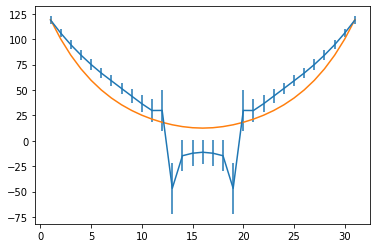

In [24]:
def f(pi_corr_avgs):
    for i in range(len(pi_corr_avgs)):
        if pi_corr_avgs[i]<0:
            pi_corr_avgs[i]=0
    return np.power(pi_corr_avgs[1:int(Nt)], 0.5)

f_blocks = get_jackknife_blocks(pi_corrs, block_size, f)
a,b = get_errors_from_blocks(f(pi_corr_avgs),f_blocks)

plt.errorbar(range(1,len(a)+1), a, yerr=b)
plt.plot(range(1,Nt), fpi_model2(range(1,Nt), fpi2, mpi_from_fpi2, alpha))